In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 시작전 설정

In [32]:
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

# 시각화를 선명하게 표시되도록
%config InlineBackend.figure_format='retina'

#한글 폰트 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안 보이게 
import warnings
# 모든 컬럼이 표시되도록 max_columns 의 수 지정
pd.options.display.max_columns = 50


# 데이터 로드

## 범죄원부 로우데이터 로드

In [3]:
df = pd.read_csv("./../data/범죄원부2017_2019.csv", sep=",",encoding='cp949')

## 데이터 확인 및 결측치 확인

In [4]:
df.shape

(9953, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9953 non-null   int64 
 1   작성년월              9953 non-null   int64 
 2   경찰서명(작성지관서)       9953 non-null   object
 3   발생 건수(전체)_건수      9953 non-null   int64 
 4   피해자 성별(남자)_건수     9953 non-null   int64 
 5   피해자 성별(여자)_건수     9953 non-null   int64 
 6   피해자 성별(불상)_건수     9953 non-null   int64 
 7   피해자 연령(6세이하)_건수   9953 non-null   int64 
 8   피해자 연령(12세이하)_건수  9953 non-null   int64 
 9   피해자 연령(15세이하)_건수  9953 non-null   int64 
 10  피해자 연령(20세이하)_건수  9953 non-null   int64 
 11  피해자 연령(30세이하)_건수  9953 non-null   int64 
 12  피해자 연령(40세이하)_건수  9953 non-null   int64 
 13  피해자 연령(50세이하)_건수  9953 non-null   int64 
 14  피해자 연령(60세이하)_건수  9953 non-null   int64 
 15  피해자 연령(60세초과)_건수  9953 non-null   int64 
 16  피해자 연령(미상)_건수     9953 non-null   int64 
 17  범죄유형(강력범죄)_건수 

In [6]:
df.isnull().sum()

Unnamed: 0          0
작성년월                0
경찰서명(작성지관서)         0
발생 건수(전체)_건수        0
피해자 성별(남자)_건수       0
피해자 성별(여자)_건수       0
피해자 성별(불상)_건수       0
피해자 연령(6세이하)_건수     0
피해자 연령(12세이하)_건수    0
피해자 연령(15세이하)_건수    0
피해자 연령(20세이하)_건수    0
피해자 연령(30세이하)_건수    0
피해자 연령(40세이하)_건수    0
피해자 연령(50세이하)_건수    0
피해자 연령(60세이하)_건수    0
피해자 연령(60세초과)_건수    0
피해자 연령(미상)_건수       0
범죄유형(강력범죄)_건수       0
범죄유형(폭력범죄)_건수       0
범죄유형(절도범죄)_건수       0
범죄유형(지능범죄)_건수       0
범죄유형(기타범죄)_건수       0
수사단서정보(고발)_건수       0
수사단서정보(고소)_건수       0
수사단서정보(진정)_건수       0
수사단서정보(탄원)_건수       0
수사단서정보(피해자신고)_건수    0
수사단서정보(타인신고)_건수     0
수사단서정보(탐문정보)_건수     0
수사단서정보(불심검문)_건수     0
수사단서정보(자수)_건수       0
수사단서정보(여죄)_건수       0
수사단서정보(변사체)_건수      0
수사단서정보(현행범)_건수      0
수사단서정보(기타)_건수       0
발생요일(일)_건수          0
발생요일(월)_건수          0
발생요일(화)_건수          0
발생요일(수)_건수          0
발생요일(목)_건수          0
발생요일(금)_건수          0
발생요일(토)_건수          0
dtype: int64

## 경찰서 관할 행정구역 로드

In [7]:
police_region = pd.read_csv("./../data/경찰서_행정구역.csv", sep=",",encoding='cp949')

In [8]:
police_region

,광역,기초,경찰서
0,강원,강릉시,강원강릉경찰서
1,강원,고성군,강원고성경찰서
2,강원,동해시,강원동해경찰서
3,강원,삼척시,강원삼척경찰서
4,강원,속초시,강원속초경찰서
...,...,...,...
282,충북,충주시,충북충주경찰서
283,충북,청주시,충북청주상당경찰서
284,충북,청주시,충북청주청원경찰서
285,충북,청주시,충북청주흥덕경찰서


# 전처리

## 분석에 필요한 컬럼만 가져오기
- 작성년월
- 경찰서명
- 피해자 남자수
- 피해자 여자수
- 피해자 불상수
- 피해자 연령 
- 범죄 유형
- 발생 요일

In [9]:
df[['작성년월','경찰서명(작성지관서)','피해자 성별(남자)_건수']]

,작성년월,경찰서명(작성지관서),피해자 성별(남자)_건수
0,201701,경기의왕경찰서,97
1,201701,경기의정부경찰서,454
2,201701,경기이천경찰서,156
3,201701,경기일산동부경찰서,411
4,201701,경기일산서부경찰서,249
...,...,...,...
9948,201912,충북충주경찰서,284
9949,201912,태안해양경비안전서,4
9950,201912,통영해양경비안전서,13
9951,201912,평택해양경비안전서,7


In [10]:
df2 = df[['작성년월',
'경찰서명(작성지관서)',
'피해자 성별(남자)_건수',
'피해자 성별(여자)_건수',
'피해자 성별(불상)_건수',
'피해자 연령(6세이하)_건수',
'피해자 연령(12세이하)_건수',
'피해자 연령(15세이하)_건수',
'피해자 연령(20세이하)_건수',
'피해자 연령(30세이하)_건수',
'피해자 연령(40세이하)_건수',
'피해자 연령(50세이하)_건수',
'피해자 연령(60세이하)_건수',
'피해자 연령(60세초과)_건수',
'피해자 연령(미상)_건수',
'범죄유형(강력범죄)_건수',
'범죄유형(폭력범죄)_건수',
'범죄유형(절도범죄)_건수',
'범죄유형(지능범죄)_건수',
'범죄유형(기타범죄)_건수',
'발생요일(일)_건수',
'발생요일(월)_건수',
'발생요일(화)_건수',
'발생요일(수)_건수',
'발생요일(목)_건수',
'발생요일(금)_건수',
'발생요일(토)_건수'
]]

In [11]:
df2.head()

,작성년월,경찰서명(작성지관서),피해자 성별(남자)_건수,피해자 성별(여자)_건수,피해자 성별(불상)_건수,피해자 연령(6세이하)_건수,피해자 연령(12세이하)_건수,피해자 연령(15세이하)_건수,피해자 연령(20세이하)_건수,피해자 연령(30세이하)_건수,피해자 연령(40세이하)_건수,피해자 연령(50세이하)_건수,피해자 연령(60세이하)_건수,피해자 연령(60세초과)_건수,피해자 연령(미상)_건수,범죄유형(강력범죄)_건수,범죄유형(폭력범죄)_건수,범죄유형(절도범죄)_건수,범죄유형(지능범죄)_건수,범죄유형(기타범죄)_건수,발생요일(일)_건수,발생요일(월)_건수,발생요일(화)_건수,발생요일(수)_건수,발생요일(목)_건수,발생요일(금)_건수,발생요일(토)_건수
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25
1,201701,경기의정부경찰서,454,332,297,4,7,9,62,145,142,167,154,94,299,9,241,106,216,511,135,147,154,169,150,171,157
2,201701,경기이천경찰서,156,89,184,0,4,5,23,55,38,46,52,21,185,3,65,15,59,287,68,66,60,65,60,52,58
3,201701,경기일산동부경찰서,411,265,210,3,4,6,31,123,143,180,127,59,210,14,143,79,157,493,102,117,134,137,124,143,129
4,201701,경기일산서부경찰서,249,142,113,1,2,4,19,67,74,92,76,55,114,7,67,40,75,315,49,70,74,66,85,87,73


## 칼럼 이름 바꾸기

In [12]:
df2.columns = ['작성년월','경찰서','남자','여자','성별미상',
               '~6','7~12','13~15','16~20','21~30','31~40','41~50','51~60','61~','나이미상',
               '강력','폭력','절도','지능','기타',
               '일','월','화','수','목','금','토']

In [13]:
df2.head()

,작성년월,경찰서,남자,여자,성별미상,~6,7~12,13~15,16~20,21~30,31~40,41~50,51~60,61~,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25
1,201701,경기의정부경찰서,454,332,297,4,7,9,62,145,142,167,154,94,299,9,241,106,216,511,135,147,154,169,150,171,157
2,201701,경기이천경찰서,156,89,184,0,4,5,23,55,38,46,52,21,185,3,65,15,59,287,68,66,60,65,60,52,58
3,201701,경기일산동부경찰서,411,265,210,3,4,6,31,123,143,180,127,59,210,14,143,79,157,493,102,117,134,137,124,143,129
4,201701,경기일산서부경찰서,249,142,113,1,2,4,19,67,74,92,76,55,114,7,67,40,75,315,49,70,74,66,85,87,73


## 행정구역과 조인

In [14]:
df3 = pd.merge(df2, police_region)


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10168
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   작성년월    10169 non-null  int64 
 1   경찰서     10169 non-null  object
 2   남자      10169 non-null  int64 
 3   여자      10169 non-null  int64 
 4   성별미상    10169 non-null  int64 
 5   ~6      10169 non-null  int64 
 6   7~12    10169 non-null  int64 
 7   13~15   10169 non-null  int64 
 8   16~20   10169 non-null  int64 
 9   21~30   10169 non-null  int64 
 10  31~40   10169 non-null  int64 
 11  41~50   10169 non-null  int64 
 12  51~60   10169 non-null  int64 
 13  61~     10169 non-null  int64 
 14  나이미상    10169 non-null  int64 
 15  강력      10169 non-null  int64 
 16  폭력      10169 non-null  int64 
 17  절도      10169 non-null  int64 
 18  지능      10169 non-null  int64 
 19  기타      10169 non-null  int64 
 20  일       10169 non-null  int64 
 21  월       10169 non-null  int64 
 22  화       10169 non-null

In [16]:
df3['광역'].unique()

array(['경기', '경남', '경북', '광주', '전북', '대구', '대전', '강원', '전남', '충남', '부산',
       '제주', '서울', '울산', '인천', '세종', '충북'], dtype=object)

## 작성년, 작성월 칼럼 추가

In [17]:
df3['작성년'] = df3['작성년월']//100
df3['작성월'] = df3['작성년월']%100
df3['총피해자'] = df3['남자']+df3['여자']+df3['성별미상']
#'abc'[1:2]

In [18]:
df3

,작성년월,경찰서,남자,여자,성별미상,~6,7~12,13~15,16~20,21~30,31~40,41~50,51~60,61~,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,작성년,작성월,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25,경기,의왕시,2017,1,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,29,45,37,37,33,39,경기,의왕시,2017,2,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,43,51,45,44,48,34,경기,의왕시,2017,3,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,41,38,36,46,53,41,경기,의왕시,2017,4,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,38,32,31,34,30,28,경기,의왕시,2017,5,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,201908,경기화성동탄경찰서,443,246,184,9,13,16,36,133,174,156,110,41,185,14,220,99,150,390,86,145,130,138,122,128,124,경기,화성시,2019,8,873
10165,201909,경기화성동탄경찰서,449,271,244,5,7,15,41,148,146,177,119,61,245,17,192,102,202,451,95,143,155,143,153,160,115,경기,화성시,2019,9,964
10166,201910,경기화성동탄경찰서,443,292,292,3,12,16,40,129,169,176,133,56,293,15,191,92,216,513,88,134,188,163,153,154,147,경기,화성시,2019,10,1027
10167,201911,경기화성동탄경찰서,556,325,228,2,17,16,44,153,206,195,158,87,231,11,204,134,327,433,113,158,189,157,180,177,135,경기,화성시,2019,11,1109


In [36]:
df_metro = df3.groupby(['광역']).sum().sort_values(by=['총피해자'],ascending=False)/1000



Text(0, 0.5, '총피해자 (단위:천명)')

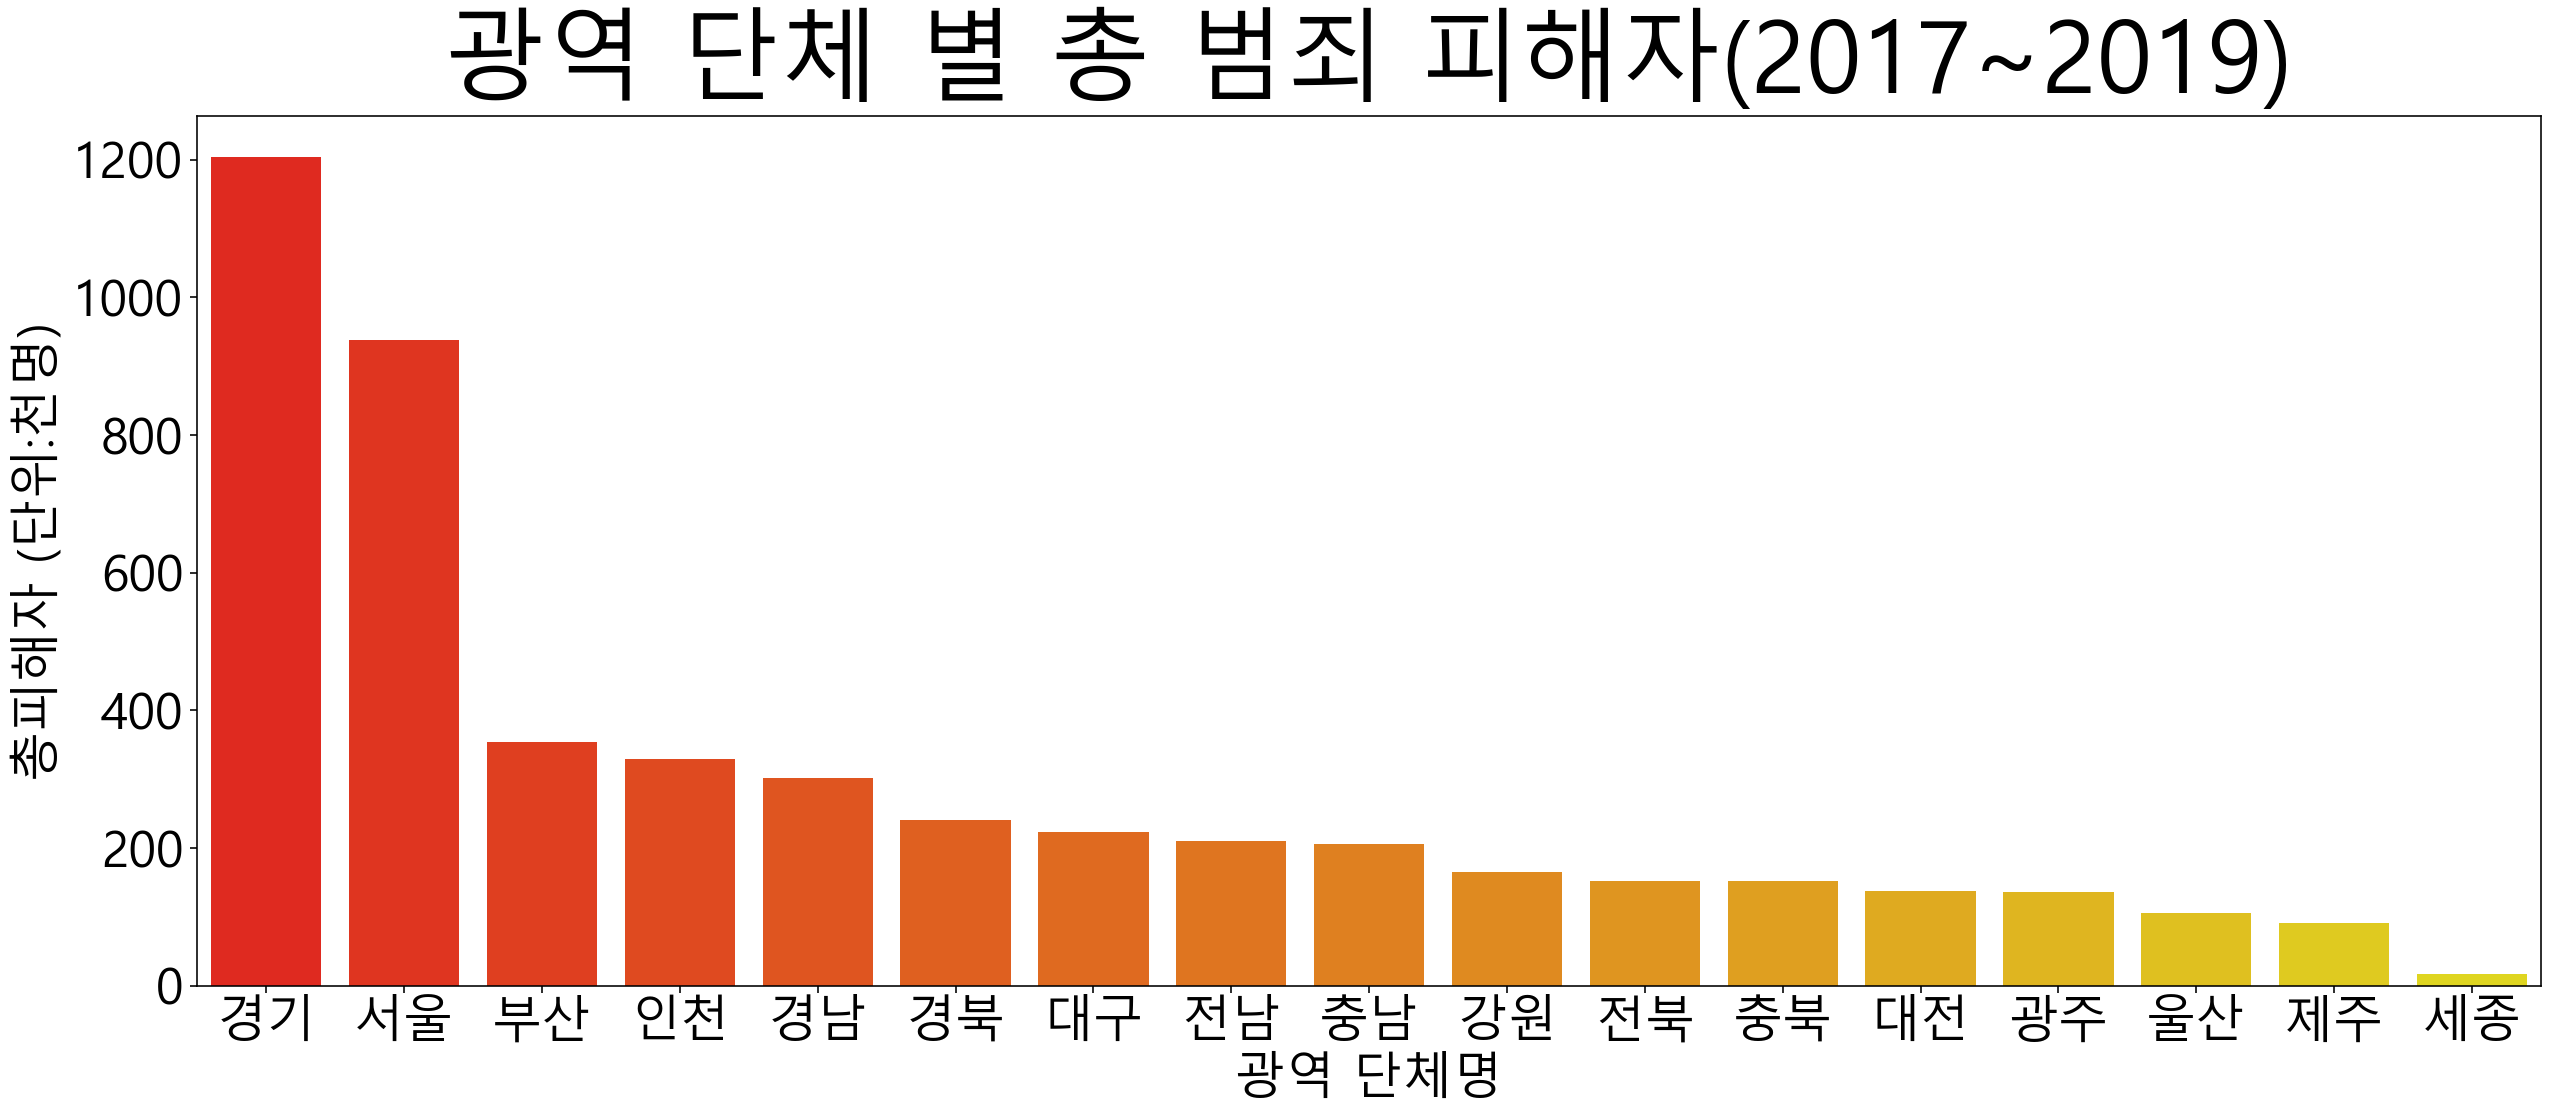

In [38]:
plt.figure(figsize=(21,8))
plt.title('광역 단체 별 총 범죄 피해자(2017~2019)', fontsize=50)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

b=sns.barplot(data=df_metro, x=df_metro.index,y='총피해자',palette='autumn')

b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('광역 단체명', fontsize=25)
b.set_ylabel('총피해자 (단위:천명)', fontsize=25)


In [91]:
df_metro2 = df3.groupby(['광역','작성년']).sum().sort_values(by=['광역','작성년','총피해자'])/1000
df_metro2 = df_metro2.reset_index()

In [90]:
df_metro2.to_csv('/df_metro2.csv', sep=',',encoding='cp949')


Text(0, 0.5, '총피해자 (단위:천명)')

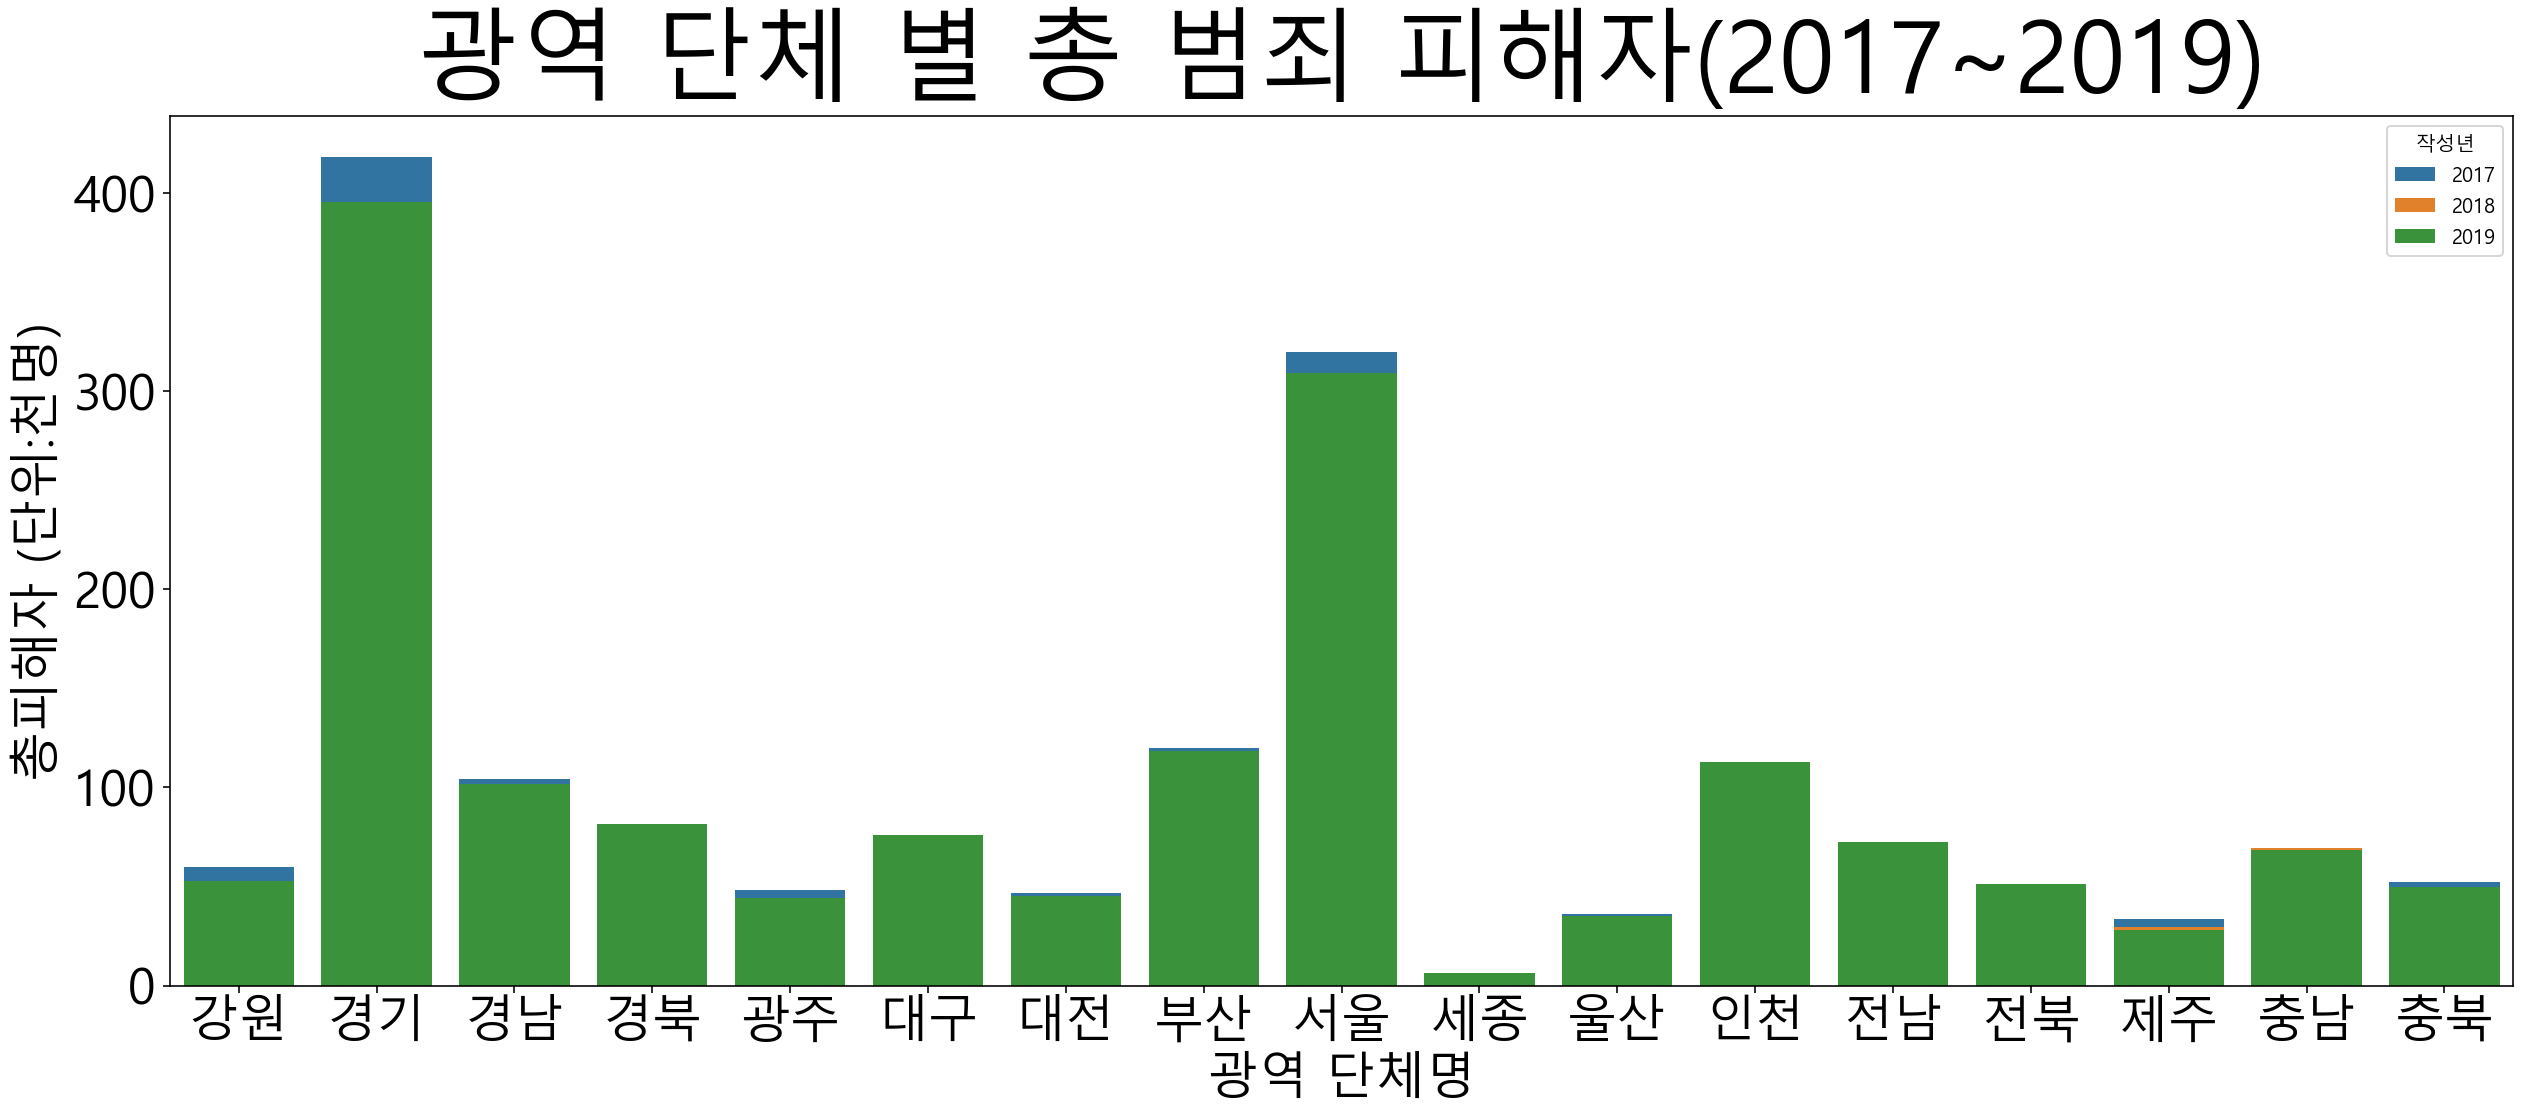

In [92]:
plt.figure(figsize=(21,8))
plt.title('광역 단체 별 총 범죄 피해자(2017~2019)', fontsize=50)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

b=sns.barplot(x='광역', y='총피해자',hue='작성년',
              data=df_metro2, dodge=False)

b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('광역 단체명', fontsize=25)
b.set_ylabel('총피해자 (단위:천명)', fontsize=25)


In [22]:
df3

,작성년월,경찰서,남자,여자,성별미상,~6,7~12,13~15,16~20,21~30,31~40,41~50,51~60,61~,나이미상,강력,폭력,절도,지능,기타,일,월,화,수,목,금,토,광역,기초,작성년,작성월,총피해자
0,201701,경기의왕경찰서,97,52,56,0,1,2,6,15,35,43,32,14,57,2,32,11,30,130,30,29,32,29,28,32,25,경기,의왕시,2017,1,205
1,201702,경기의왕경찰서,123,65,62,1,2,2,6,17,42,46,46,26,62,5,30,18,42,155,30,29,45,37,37,33,39,경기,의왕시,2017,2,250
2,201703,경기의왕경찰서,135,68,100,0,1,1,9,27,39,51,53,22,100,3,45,11,48,196,38,43,51,45,44,48,34,경기,의왕시,2017,3,303
3,201704,경기의왕경찰서,119,74,95,3,1,6,13,27,37,40,47,19,95,5,48,22,36,177,33,41,38,36,46,53,41,경기,의왕시,2017,4,288
4,201705,경기의왕경찰서,103,45,84,0,2,0,7,26,35,29,37,12,84,1,25,13,42,151,39,38,32,31,34,30,28,경기,의왕시,2017,5,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,201908,경기화성동탄경찰서,443,246,184,9,13,16,36,133,174,156,110,41,185,14,220,99,150,390,86,145,130,138,122,128,124,경기,화성시,2019,8,873
10165,201909,경기화성동탄경찰서,449,271,244,5,7,15,41,148,146,177,119,61,245,17,192,102,202,451,95,143,155,143,153,160,115,경기,화성시,2019,9,964
10166,201910,경기화성동탄경찰서,443,292,292,3,12,16,40,129,169,176,133,56,293,15,191,92,216,513,88,134,188,163,153,154,147,경기,화성시,2019,10,1027
10167,201911,경기화성동탄경찰서,556,325,228,2,17,16,44,153,206,195,158,87,231,11,204,134,327,433,113,158,189,157,180,177,135,경기,화성시,2019,11,1109


In [23]:
df_metro_time.iloc[:, df_metro_time.columns.get_level_values('광역') == 1]

KeyError: 'Requested level (광역) does not match index name (None)'

In [ ]:
df_metro_time.columns

In [ ]:
df_metro_time.index.get_level_values(0)